In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext Cython
%timeit

import matplotlib
matplotlib.style.use('ggplot')
import pandas

# General instructions for cython

#### distutils

Python standard library includes the `distutils` package for building packaging and distributing python projects. We will use `distutils` for compiling C source into an extension module. We will not directly write C code. We will use `Cython` to generate C code for us. Then the c code will be compiled to an extension module using `distutils.core.setup`.

Let us assume we have written a `Cython` function 'some_function.pyx'. Then the following code is compiles the Cython function to C.

```
from distutils.core import setup
from Cython.Build import cythonize

setup(ext_modules=cythonize('some_function.pyx')
```

We can put the previous code into a file `setup_cy.py` and run in the terminal

```
python setup_cy.py build_ext --inplace
```
Notice that:
- the `build_ext` argument is an standard `distutils` argument to build the `Extension` object (or objects) that the `cythonize` command inside `setup_cy.py` created.


# Cython notebook

To use cython code inisde a cell use the ``%%cython`` marker to compile it.

## Example 1)  fibonnachi

In [184]:
%%cython 

cdef cy_fib(int n):
    cdef int i
    cdef double a=0.0, b=1.0
    for i in range(n):
        a, b = a + b, a
    return a

In [185]:
def fib(n):
    a = 0
    b = 1
    for i in range(n):
        a, b = a + b, a
    return a

In [188]:
cy_fib(10)

55.0

In [189]:
fib(10)

55

In [186]:
%timeit cy_fib(1000)

1000000 loops, best of 3: 1.11 µs per loop


In [187]:
%timeit fib(1000)

10000 loops, best of 3: 74.2 µs per loop


In [92]:
df_time = pandas.DataFrame({"python_fib":[73.6],
                            "cython_fib":[1.13]})

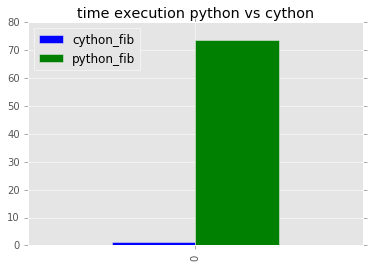

In [100]:
df_time.plot(kind='bar', title="time execution python vs cython")

### Annotations in cython

You can show Cython’s code analysis by passing the --annotate option:

In [183]:
%%cython --annotate

cdef cy_fib(int n):
    cdef int i
    cdef double a=0.0, b=1.0
    for i in range(n):
        a, b = a + b, a
    return a

## Example 2)  Find divisors


In [118]:
import math

def all_divisors(x):
    divisors = []
    for i in range(1,x/2+1):
        if x%i ==0:
            divisors.append(i)
    
    return divisors


In [171]:
%timeit all_divisors(10000)

1000 loops, best of 3: 248 µs per loop


In [161]:
%%cython

def cy_all_divisors(int x):
    cdef int i    
    divisors = []
    
    for i in range(1,x/2+1):
        if x%i ==0:
            divisors.append(i)
    
    return divisors

In [172]:
%timeit cy_all_divisors(10000)

10000 loops, best of 3: 23.6 µs per loop


In [170]:
%%cython --annotate

def cy_all_divisors(int x):
    cdef int i    
    divisors = []
    
    for i in range(1,x/2+1):
        if x % i == 0:
            divisors.append(i)
    
    return divisors